# Project 1: Irish Dataset

### Done by: Kishan Kanaiyalal Patel (200527734)


### --------------------------------------------------------------------------

## Step 1: Loading the dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Reading the CSV file
iris= pd.read_csv('iris.csv')

## Step 2: Performing EDA on the dataset

In [2]:
#Printing first 5 rows
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#Renaming the column name
iris=iris.rename(columns={'sepal.length': 'Sepal_Length', 'sepal.width': 'Sepal_Width', 'petal.length': 'Petal_Length', 'petal.width': 'Petal_Width', 'variety': 'Species'})
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Checking missing value
iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [7]:
iris.value_counts("Species")

Species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

## Relations between variables

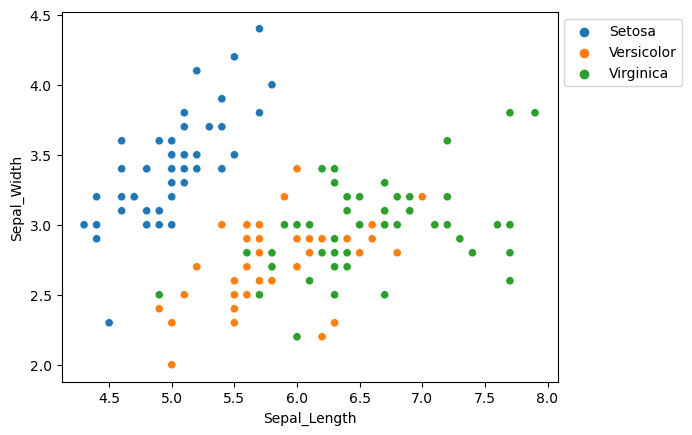

In [8]:
### Comparing Sepal Length and Sepal Width

sns.scatterplot(x='Sepal_Length', y='Sepal_Width',
                hue='Species', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

The figure shown above indicates that -

1. The sepal width of the Setosa species are wider but have shorter lengths.
2. In terms of sepal length and width, the Versicolor Species is in the midst of the other two species.
3. The sepal lengths of the species Virginica are longer, but narrow in width.

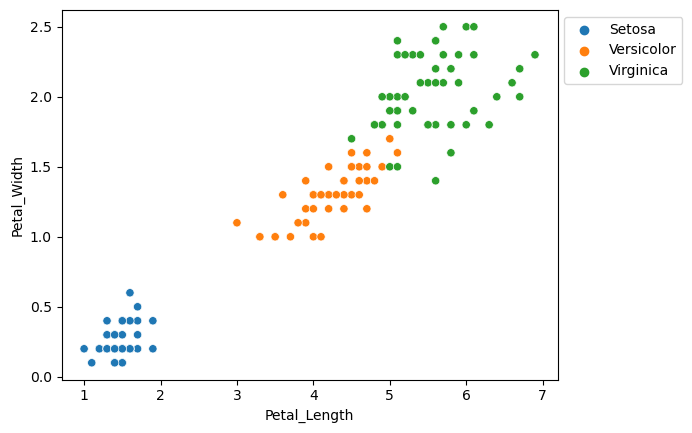

In [9]:
### Comparing Petal Length and Petal Width

sns.scatterplot(x='Petal_Length', y='Petal_Width',
                hue='Species', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

The figure shown above indicates that -

1. The petal lengths and widths of the Setosa species are smaller.
2. In terms of petal length and width, the Versicolor Species is in the midst of the other two species.
3. The biggest petal lengths and widths are seen in the species Virginica.

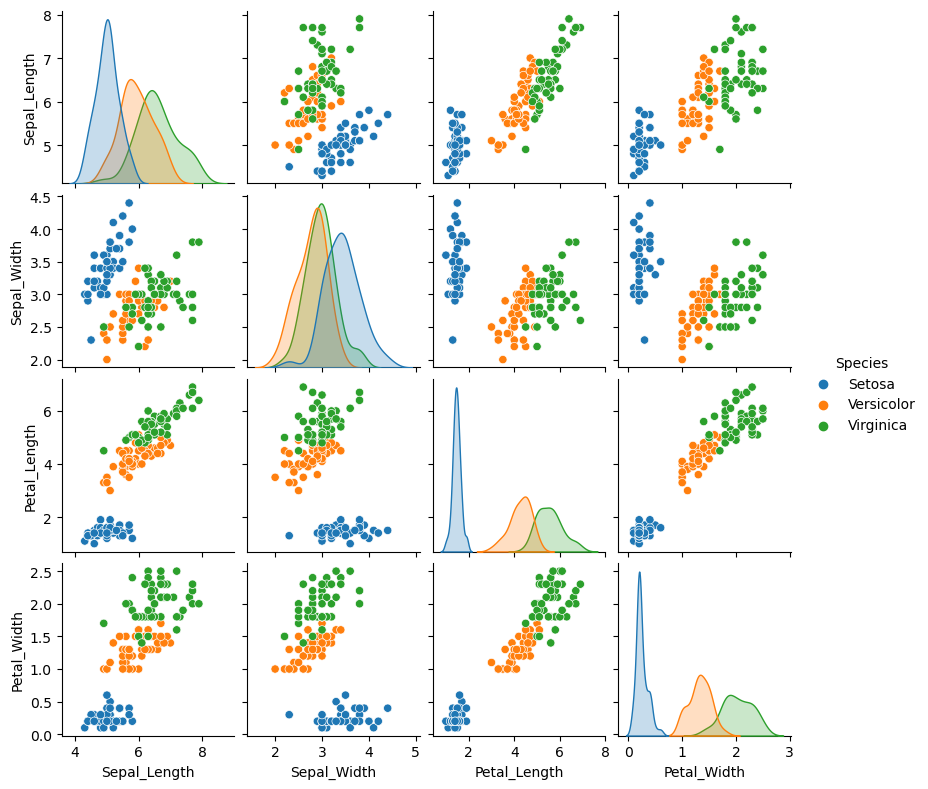

In [10]:
sns.pairplot(iris, hue='Species', height=2)

From this figure, we may infer a variety of correlations, 

such as the fact that the Seotsa species has the shortest petal widths and lengths. Additionally, it has the shortest sepal length and the widest sepal breadth.

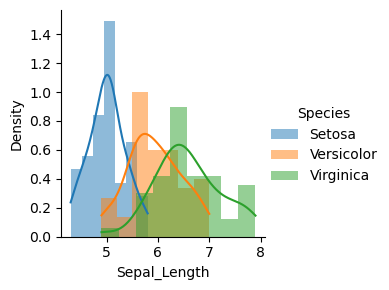

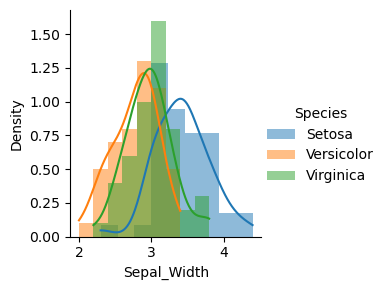

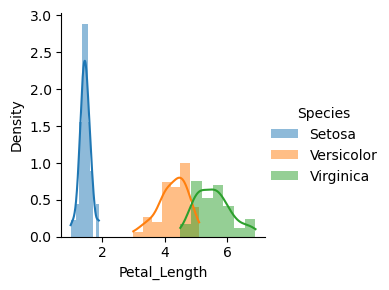

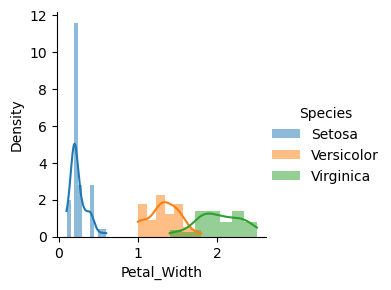

In [11]:
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "Sepal_Length", kde=True, stat="density", linewidth=0).add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "Sepal_Width", kde=True, stat="density", linewidth=0).add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "Petal_Length", kde=True, stat="density", linewidth=0).add_legend()
  
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "Petal_Width",  kde=True, stat="density", linewidth=0).add_legend()
  
plt.show()

The figure shown above infers that - 

We can use Petal_Length and Petal_Width as the classification feature since these features have less overlapping.

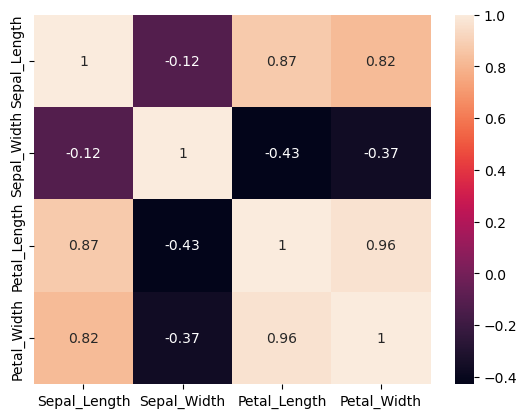

In [12]:
sns.heatmap(iris.corr(method='pearson'),annot = True);

The graph shown above demonstrates that -

1. High correlation exists between petal length and width.
2. There is good correlation between petal length and sepal width.
3. There is good correlation between Petal Width and Sepal Length.

## Step 3: Encoding the target variable. (Converting categorical data to numerical)

In [13]:
species_num = {'Setosa': 0, 'Versicolor': 1,'Virginica': 2}

iris['Species'] = iris['Species'].map(species_num)

In [14]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris.to_csv('iris_new.csv', index= False)

## Step 4A: Splitting the data into training, validation and test set (60:20:20)

In [16]:
from sklearn.model_selection import train_test_split

iris_new = pd.read_csv('iris_new.csv')
iris_new.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
features = iris_new.drop('Species', axis=1)
labels = iris_new['Species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [19]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

## a) Implementing KFold Cross Validation (K=10)

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
iris_features_tr = pd.read_csv('train_features.csv')
iris_labels_tr = pd.read_csv('train_labels.csv')

In [21]:
iris_rf = RandomForestClassifier()

iris_rf_scores = cross_val_score(iris_rf, iris_features_tr, iris_labels_tr.values.ravel(), cv=10)
iris_rf_scores

array([0.88888889, 1.        , 0.77777778, 0.66666667, 1.        ,
       1.        , 1.        , 0.88888889, 1.        , 0.88888889])

## b) Implementing GridSearch CV to find optimal hyperparameters for Logistic Regression (LR), Random Forest (RF) and Support Vector Machine (SVM)

### 1. Logistic Regression 

In [22]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [23]:
def iris_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [24]:
iris_lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

iris_cv1 = GridSearchCV(iris_lr, parameters, cv=10)
iris_cv1.fit(iris_features_tr, iris_labels_tr.values.ravel())

iris_results(iris_cv1)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

BEST PARAMS: {'C': 10}

0.711 (+/-0.178) for {'C': 0.001}
0.844 (+/-0.227) for {'C': 0.01}
0.922 (+/-0.2) for {'C': 0.1}
0.944 (+/-0.205) for {'C': 1}
0.967 (+/-0.142) for {'C': 10}
0.967 (+/-0.142) for {'C': 100}
0.956 (+/-0.147) for {'C': 1000}


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
iris_cv1.best_estimator_


LogisticRegression(C=10)

### 2. Support Vector Machine

In [26]:
iris_svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100]
}

iris_cv2 = GridSearchCV(iris_svc, parameters, cv=10)
iris_cv2.fit(iris_features_tr, iris_labels_tr.values.ravel())

iris_results(iris_cv2)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.878 (+/-0.185) for {'C': 0.01, 'kernel': 'linear'}
0.422 (+/-0.356) for {'C': 0.01, 'kernel': 'rbf'}
0.944 (+/-0.149) for {'C': 0.1, 'kernel': 'linear'}
0.867 (+/-0.166) for {'C': 0.1, 'kernel': 'rbf'}
0.967 (+/-0.142) for {'C': 1, 'kernel': 'linear'}
0.944 (+/-0.149) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.147) for {'C': 10, 'kernel': 'linear'}
0.956 (+/-0.147) for {'C': 10, 'kernel': 'rbf'}
0.967 (+/-0.142) for {'C': 100, 'kernel': 'linear'}
0.933 (+/-0.147) for {'C': 100, 'kernel': 'rbf'}


In [27]:
iris_cv2.best_estimator_

SVC(C=1, kernel='linear')

### 3. Random Forest

In [28]:
iris_rf = RandomForestClassifier()
parameters = {
    'n_estimators': [10, 50, 150],
    'max_depth': [2, 4, 8, 16, 32, None]
}

iris_cv3 = GridSearchCV(iris_rf, parameters, cv=10)
iris_cv3.fit(iris_features_tr, iris_labels_tr.values.ravel())

iris_results(iris_cv3)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 150}

0.911 (+/-0.218) for {'max_depth': 2, 'n_estimators': 10}
0.922 (+/-0.223) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.227) for {'max_depth': 2, 'n_estimators': 150}
0.911 (+/-0.218) for {'max_depth': 4, 'n_estimators': 10}
0.922 (+/-0.223) for {'max_depth': 4, 'n_estimators': 50}
0.944 (+/-0.179) for {'max_depth': 4, 'n_estimators': 150}
0.944 (+/-0.149) for {'max_depth': 8, 'n_estimators': 10}
0.911 (+/-0.218) for {'max_depth': 8, 'n_estimators': 50}
0.911 (+/-0.218) for {'max_depth': 8, 'n_estimators': 150}
0.944 (+/-0.179) for {'max_depth': 16, 'n_estimators': 10}
0.922 (+/-0.223) for {'max_depth': 16, 'n_estimators': 50}
0.933 (+/-0.227) for {'max_depth': 16, 'n_estimators': 150}
0.944 (+/-0.149) for {'max_depth': 32, 'n_estimators': 10}
0.911 (+/-0.218) for {'max_depth': 32, 'n_estimators': 50}
0.922 (+/-0.223) for {'max_depth': 32, 'n_estimators': 150}
0.911 (+/-0.218) for {'max_depth': None, 'n_estimators': 10}
0.933 

In [29]:
iris_cv3.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=150)

## C) Analysing the results and comparing the models

In [30]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

iris_features_val = pd.read_csv('val_features.csv')
iris_labels_val = pd.read_csv('val_labels.csv')

iris_features_te = pd.read_csv('test_features.csv')
iris_labels_te = pd.read_csv('test_labels.csv')

In [31]:
LR=iris_cv1.best_estimator_
RF=iris_cv2.best_estimator_
SVM=iris_cv3.best_estimator_

In [32]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [33]:
iris_models={'LR':LR,'RF':RF,'SVM':SVM}
iris_models

{'LR': LogisticRegression(C=10),
 'RF': SVC(C=1, kernel='linear'),
 'SVM': RandomForestClassifier(max_depth=4, n_estimators=150)}

In [34]:
for iris_mdl in iris_models:
     evaluate_model(iris_mdl, iris_models[iris_mdl], iris_features_val, iris_labels_val)

LR -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 2.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
SVM -- Accuracy: 0.967 / Precision: 0.976 / Recall: 0.944 / Latency: 13.2ms


## Step 4B: Splitting the data into training, validation and test set (80:10:10)

In [35]:
features_b = iris_new.drop('Species', axis=1)
labels_b = iris_new['Species']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features_b, labels_b, test_size=0.2, random_state=42)
X_test_b, X_val_b, y_test_b, y_val_b = train_test_split(X_test_b, y_test_b, test_size=0.5, random_state=42)

In [36]:
for dataset_b in [y_train_b, y_val_b, y_test_b]:
    print(round(len(dataset_b) / len(labels), 2))

0.8
0.1
0.1


In [37]:
X_train_b.to_csv('train_features_b.csv', index=False)
X_val_b.to_csv('val_features_b.csv', index=False)
X_test_b.to_csv('test_features_b.csv', index=False)

y_train_b.to_csv('train_labels_b.csv', index=False)
y_val_b.to_csv('val_labels_b.csv', index=False)
y_test_b.to_csv('test_labels_b.csv', index=False)

## a) Implementing KFold Cross Validation (K=10)

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

iris_features_trb = pd.read_csv('train_features_b.csv')

iris_labels_trb = pd.read_csv('train_labels_b.csv')

In [39]:
iris_rfb = RandomForestClassifier()

iris_rfb_scores = cross_val_score(iris_rfb, iris_features_trb, iris_labels_trb.values.ravel(), cv=10)
iris_rfb_scores

array([0.91666667, 1.        , 0.91666667, 1.        , 0.66666667,
       0.83333333, 1.        , 0.91666667, 1.        , 0.91666667])

## b) Implementing GridSearch CV to find optimal hyperparameters for Logistic Regression (LR), Random Forest (RF) and Support Vector Machine (SVM)

### 1. Logistic Regression

In [40]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [41]:
iris_lrb = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

iris_cv4 = GridSearchCV(iris_lrb, parameters, cv=10)
iris_cv4.fit(iris_features_trb, iris_labels_trb.values.ravel())

iris_results(iris_cv4)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

BEST PARAMS: {'C': 1}

0.842 (+/-0.203) for {'C': 0.001}
0.867 (+/-0.213) for {'C': 0.01}
0.95 (+/-0.153) for {'C': 0.1}
0.95 (+/-0.17) for {'C': 1}
0.942 (+/-0.13) for {'C': 10}
0.942 (+/-0.167) for {'C': 100}
0.942 (+/-0.167) for {'C': 1000}


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [42]:
iris_cv4.best_estimator_

LogisticRegression(C=1)

### 2. Support Vector Machine

In [43]:
iris_svcb = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100]
}

iris_cv5 = GridSearchCV(iris_svcb, parameters, cv=10)
iris_cv5.fit(iris_features_trb, iris_labels_trb.values.ravel())

iris_results(iris_cv5)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.942 (+/-0.13) for {'C': 0.01, 'kernel': 'linear'}
0.4 (+/-0.4) for {'C': 0.01, 'kernel': 'rbf'}
0.958 (+/-0.134) for {'C': 0.1, 'kernel': 'linear'}
0.925 (+/-0.174) for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.112) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.133) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.133) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.133) for {'C': 10, 'kernel': 'rbf'}
0.942 (+/-0.167) for {'C': 100, 'kernel': 'linear'}
0.925 (+/-0.203) for {'C': 100, 'kernel': 'rbf'}


In [44]:
iris_cv5.best_estimator_

SVC(C=0.1, kernel='linear')

### 3. Random Forest

In [45]:
iris_rfb = RandomForestClassifier()
parameters = {
    'n_estimators': [10, 50, 150],
    'max_depth': [2, 4, 8, 16, 32, None]
}

iris_cv6 = GridSearchCV(iris_rfb, parameters, cv=10)
iris_cv6.fit(iris_features_trb, iris_labels_trb.values.ravel())

iris_results(iris_cv6)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 10}

0.933 (+/-0.194) for {'max_depth': 2, 'n_estimators': 10}
0.933 (+/-0.208) for {'max_depth': 2, 'n_estimators': 50}
0.925 (+/-0.203) for {'max_depth': 2, 'n_estimators': 150}
0.942 (+/-0.167) for {'max_depth': 4, 'n_estimators': 10}
0.942 (+/-0.198) for {'max_depth': 4, 'n_estimators': 50}
0.933 (+/-0.194) for {'max_depth': 4, 'n_estimators': 150}
0.933 (+/-0.208) for {'max_depth': 8, 'n_estimators': 10}
0.933 (+/-0.194) for {'max_depth': 8, 'n_estimators': 50}
0.933 (+/-0.208) for {'max_depth': 8, 'n_estimators': 150}
0.925 (+/-0.203) for {'max_depth': 16, 'n_estimators': 10}
0.933 (+/-0.208) for {'max_depth': 16, 'n_estimators': 50}
0.925 (+/-0.203) for {'max_depth': 16, 'n_estimators': 150}
0.925 (+/-0.203) for {'max_depth': 32, 'n_estimators': 10}
0.933 (+/-0.208) for {'max_depth': 32, 'n_estimators': 50}
0.933 (+/-0.208) for {'max_depth': 32, 'n_estimators': 150}
0.925 (+/-0.203) for {'max_depth': None, 'n_estimators': 10}
0.925 (

In [46]:
iris_cv6.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=10)

## C) Analysing the results and comparing the models

In [47]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

iris_features_valb = pd.read_csv('val_features_b.csv')
iris_labels_valb = pd.read_csv('val_labels_b.csv')

iris_features_teb = pd.read_csv('test_features_b.csv')
iris_labels_teb = pd.read_csv('test_labels_b.csv')

In [48]:
LR_b=iris_cv4.best_estimator_
RF_b=iris_cv5.best_estimator_
SVM_b=iris_cv6.best_estimator_

In [49]:
def evaluate_modelb(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [50]:
iris_modelsb={'LR':LR_b,'RF':RF_b,'SVM':SVM_b}
iris_modelsb

{'LR': LogisticRegression(C=1),
 'RF': SVC(C=0.1, kernel='linear'),
 'SVM': RandomForestClassifier(max_depth=4, n_estimators=10)}

In [52]:
for iris_mdlb in iris_modelsb:
     evaluate_model(iris_mdlb, iris_modelsb[iris_mdlb], iris_features_valb, iris_labels_valb)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 4.0ms


### Conclusion

1. While comparing the algorithms in 60:20:20 split, Random forest turned out to be the best algorithm since it was most accurate in predicting the species of iris and execution speed was also very fast.

2. While comparing the algorithms in 80:10:10 split, every algorithms turned out to be the best: However, I would choose Logistic Regression because it works better with already identified independent variables, whereas Random Forest works better for categorical data and SVM works better for unstructured or semi-structured data.

3. Since it is small dataset, either of the split could work better. If it would have been a large dataset then higher training set is preferred. 